In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# Résolution de systeme lineaire

In [2]:
generate_h = lambda n : np.fromfunction(lambda i, j: 1/(1+ i + j ), (n, n), dtype=int) + np.eye(n)
N = [2, 5, 10, 20, 50]

H_matrix = [generate_h(i) for i in N]

## Methode de Jacobi

In [13]:
def my_jacobi(A : np.ndarray, b: np.ndarray, x0: np.ndarray=None , epsilon=10e-12, max_iter=1000):
    if x0 is not None:
        assert x0.shape == A.shape[0]
    else:
        x0 = np.ones((A.shape[0],))
    M = np.diag(np.diag(A))
    N = M - A
    try:
        M_inv = np.diag(1/np.diag(M))
    except:
        M_inv = np.linalg.inv(M)
    
    J = M_inv@N
    B = M_inv@b
    x_old = x0.copy()
    x_history = [x_old]
    for k in range(max_iter):
        x_new = J@x_old + B
        x_history.append(x_new)
        if np.linalg.norm(x_new - x_old) < epsilon:
            break
        x_old = x_new.copy()
    errors = np.subtract(np.array(x_history) , x_new)
    errors = np.linalg.norm(x_history, axis=1)
    return x_new, errors

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/linalg/linalg.py:2541: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/linalg/linalg.py:2542: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))


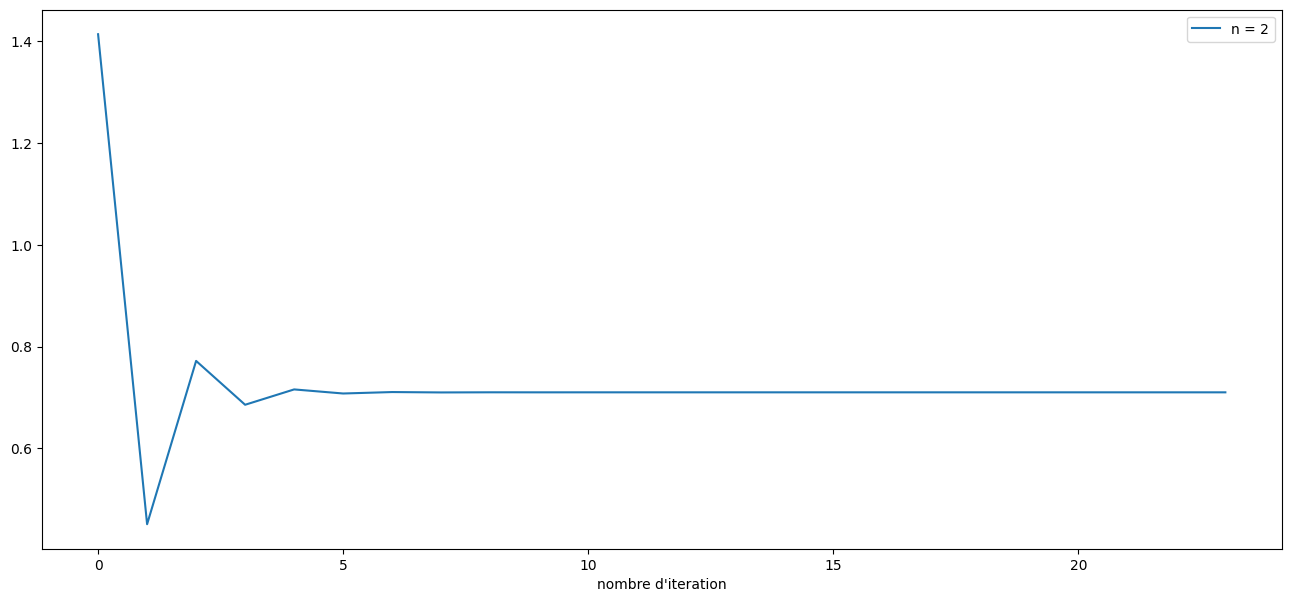

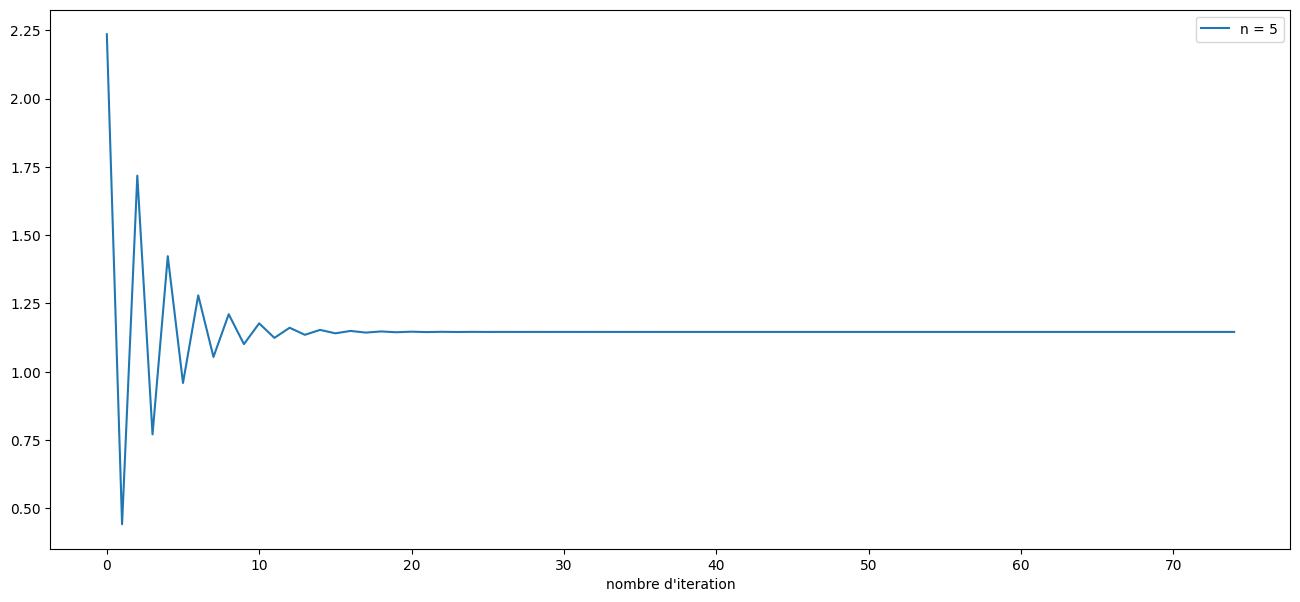

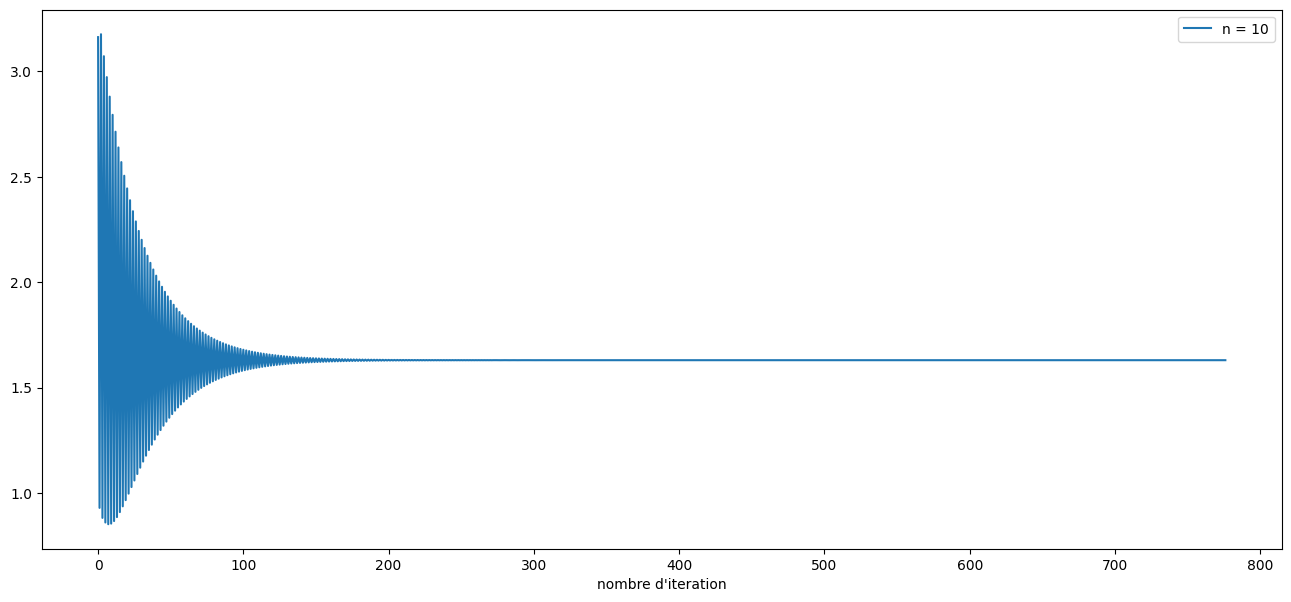

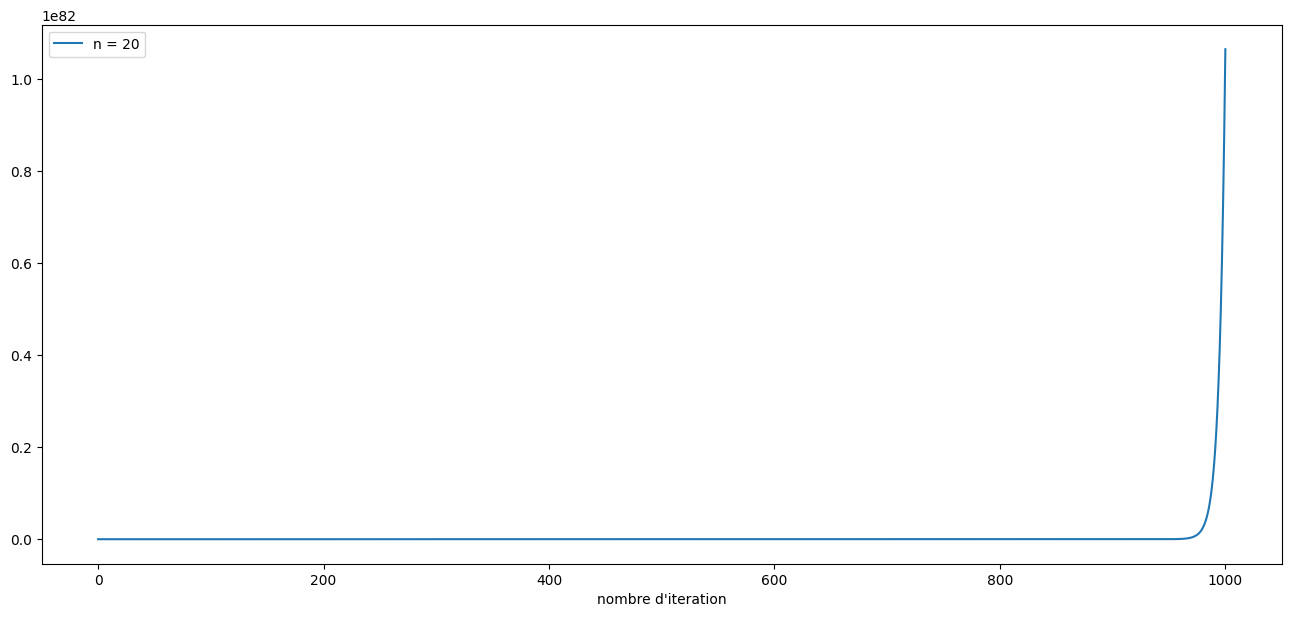

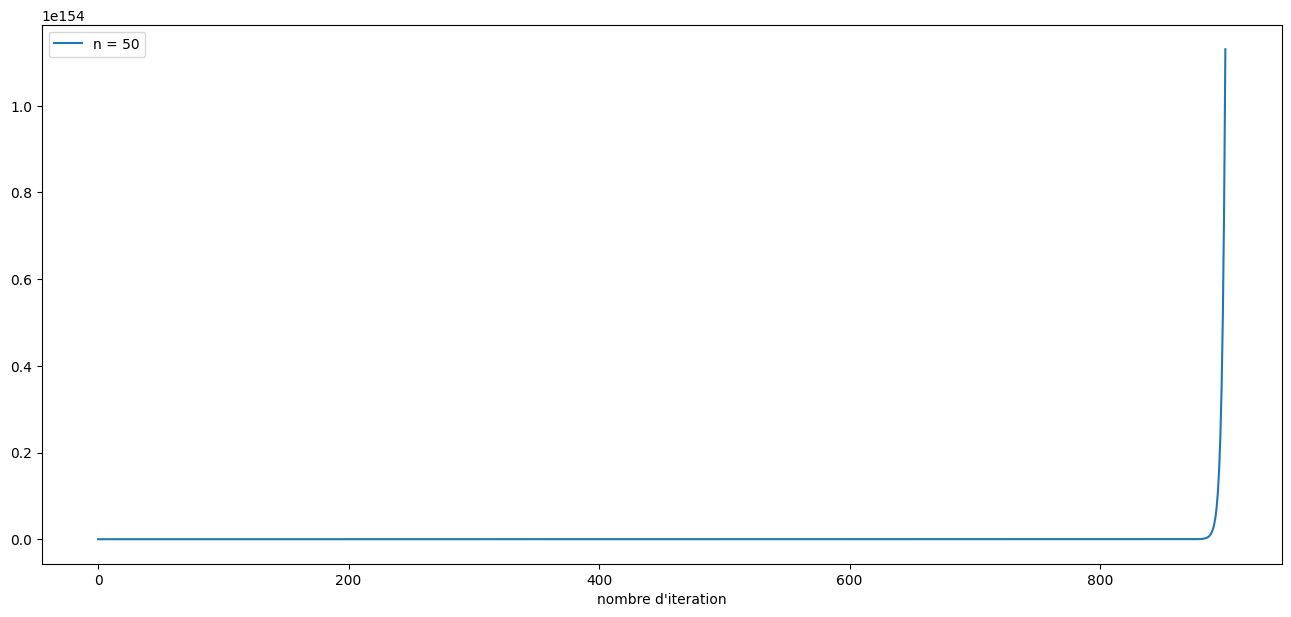

In [14]:
for n in range(len(H_matrix)):
    plt.figure(figsize=(16,7))
    A = H_matrix[n]
    b = np.ones(A.shape[0])
    x_star, errors = my_jacobi(A, b)
    plt.plot(np.arange(errors.size), errors, label=f"n = {N[n]}")
    plt.xlabel("nombre d'iteration")
    plt.legend()

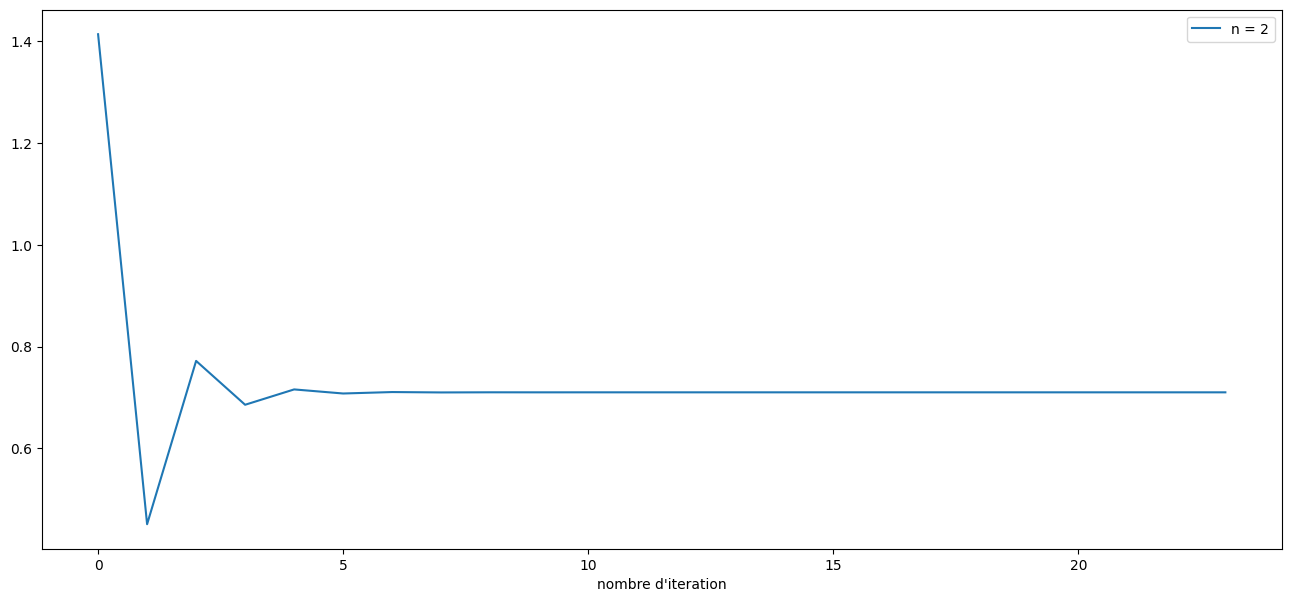

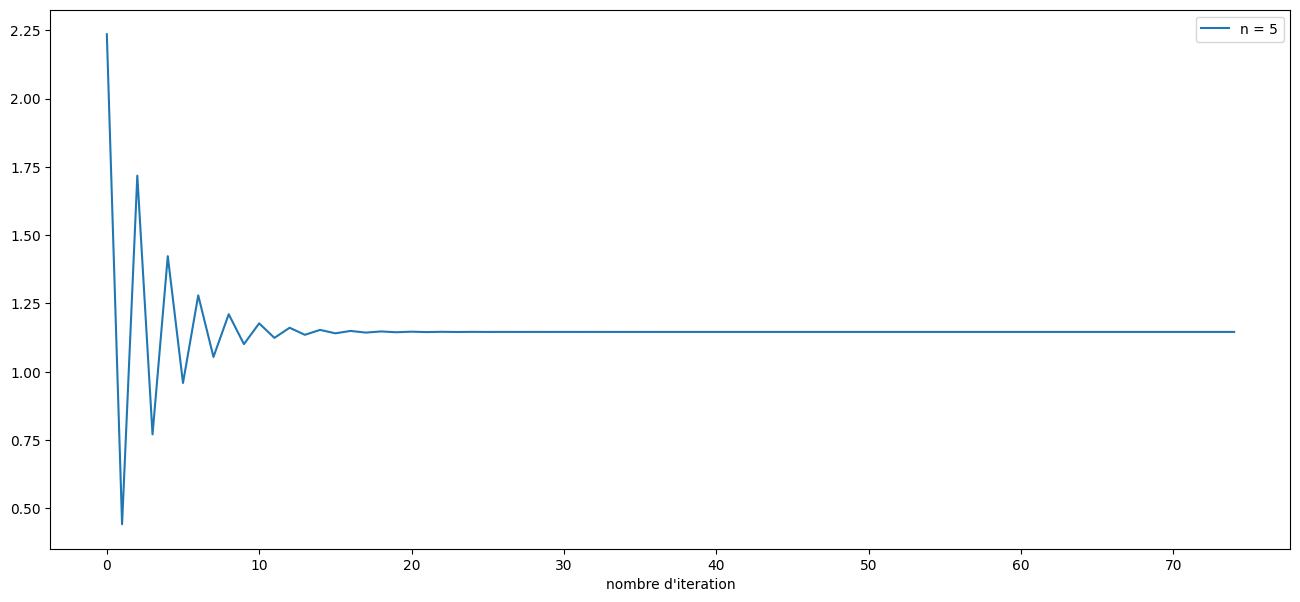

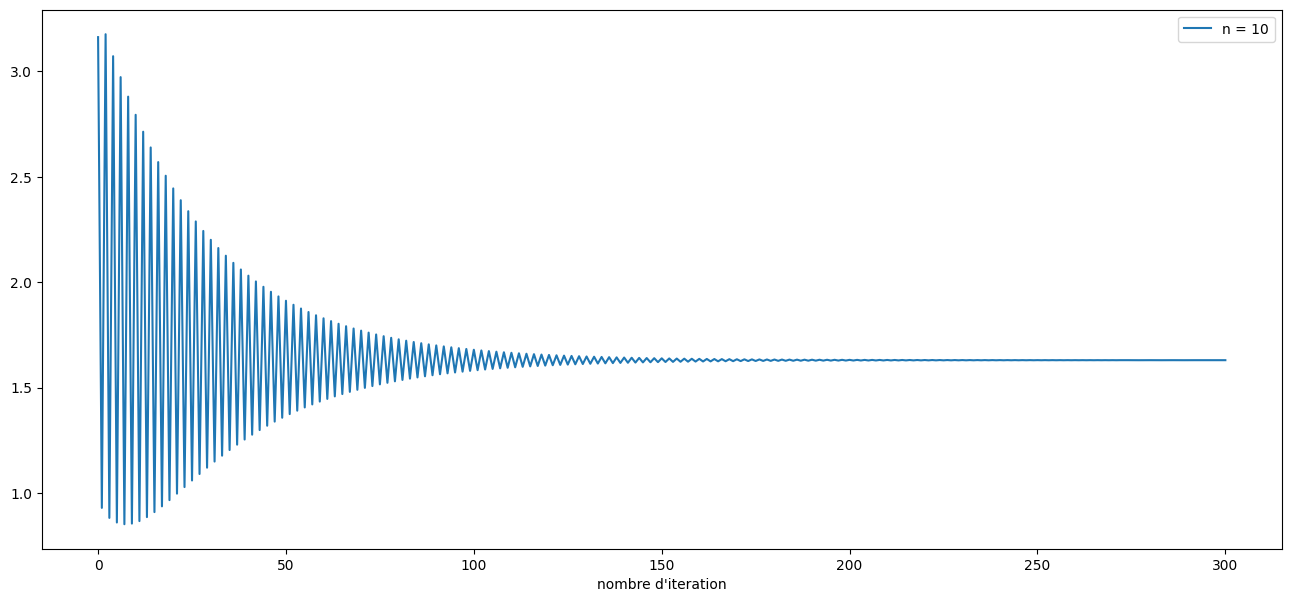

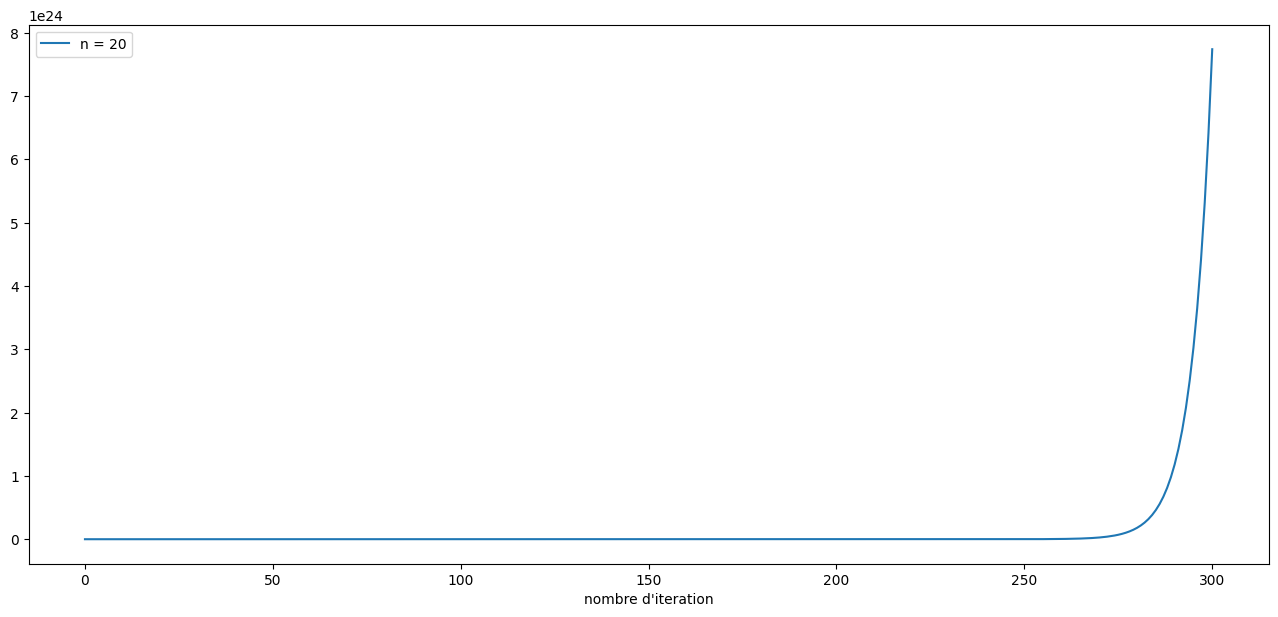

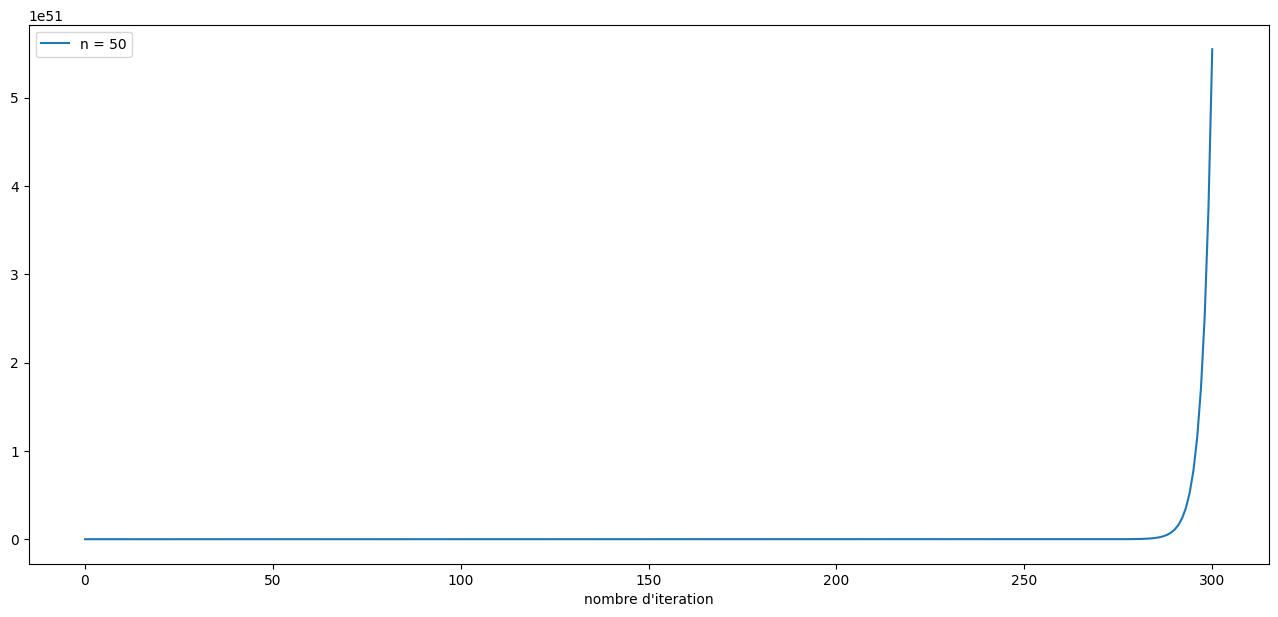

In [15]:
def my_jacobi(A : np.ndarray, b: np.ndarray, x0: np.ndarray=None , epsilon=10e-12, max_iter=300):
    if x0 is not None:
        assert x0.shape == A.shape[0]
    else:
        x0 = np.ones((A.shape[0]))
    M = np.diag(np.diag(A))
    N = M - A
    try:
        M_inv = np.diag(1/np.diag(M))
    except:
        M_inv = np.linalg.inv(M)
    
    J = M_inv@N
    B = M_inv@b
    x_old = x0.copy()
    x_history = [x_old]
    for k in range(max_iter):
        x_new = J@x_old + B
        x_history.append(x_new)
        if np.linalg.norm(x_new - x_old) < epsilon:
            break
        x_old = x_new.copy()
    errors = np.subtract(np.array(x_history) , x_new)
    errors = np.linalg.norm(x_history, axis=1)
    return x_new, errors


for n in range(len(H_matrix)):
    plt.figure(figsize=(16,7))
    A = H_matrix[n]
    b = np.ones(A.shape[0])
    x_star, errors = my_jacobi(A, b)
    plt.plot(np.arange(errors.size), errors, label=f"n = {N[n]}")
    plt.xlabel("nombre d'iteration")
    plt.legend()

## Methode de Gauss-seidel

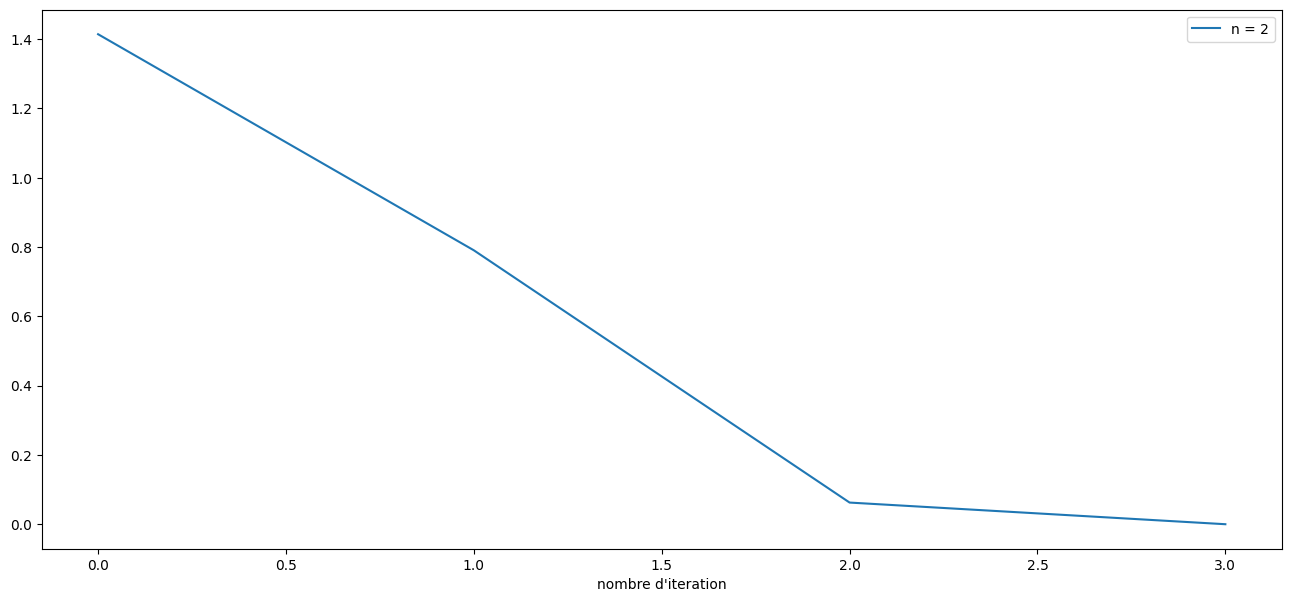

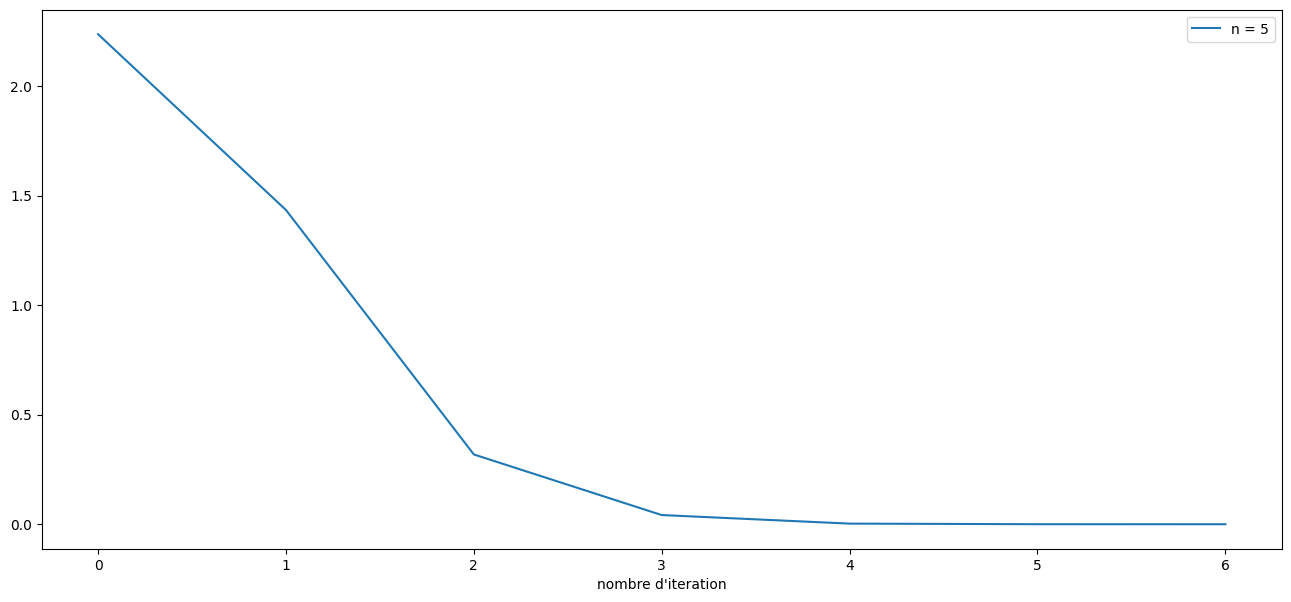

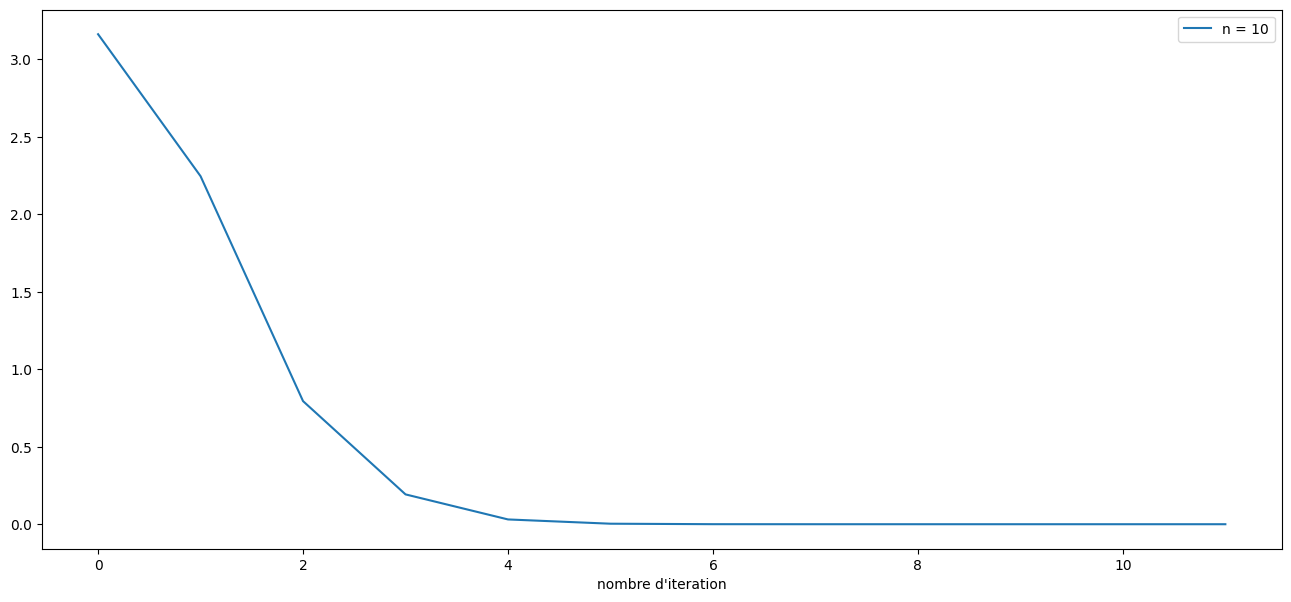

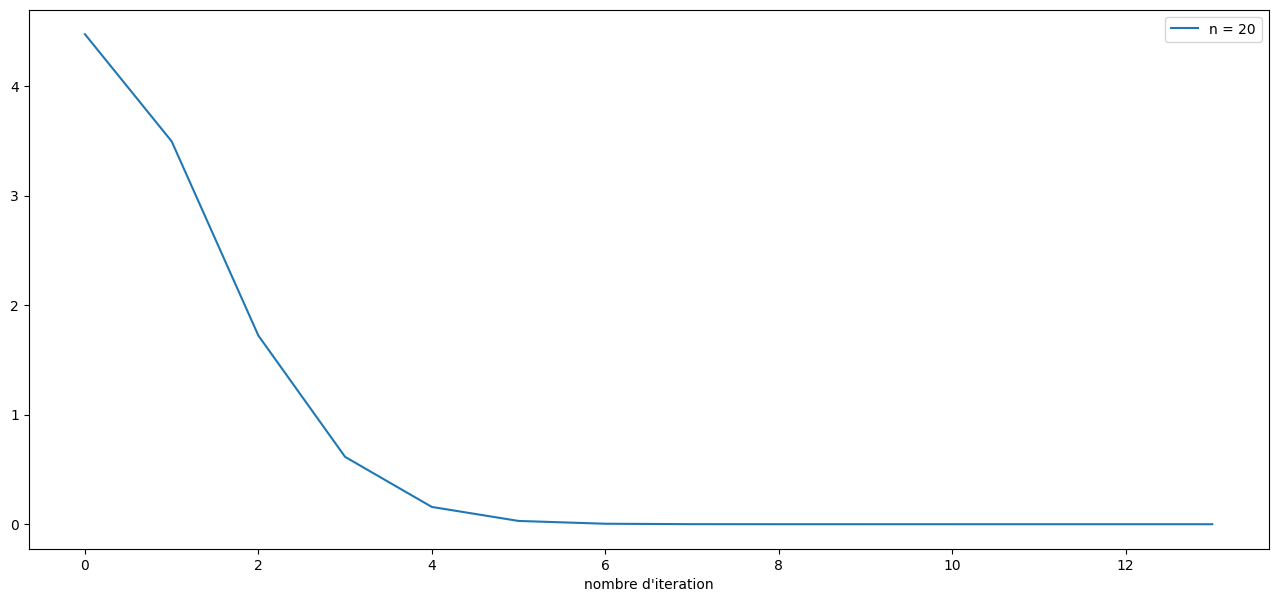

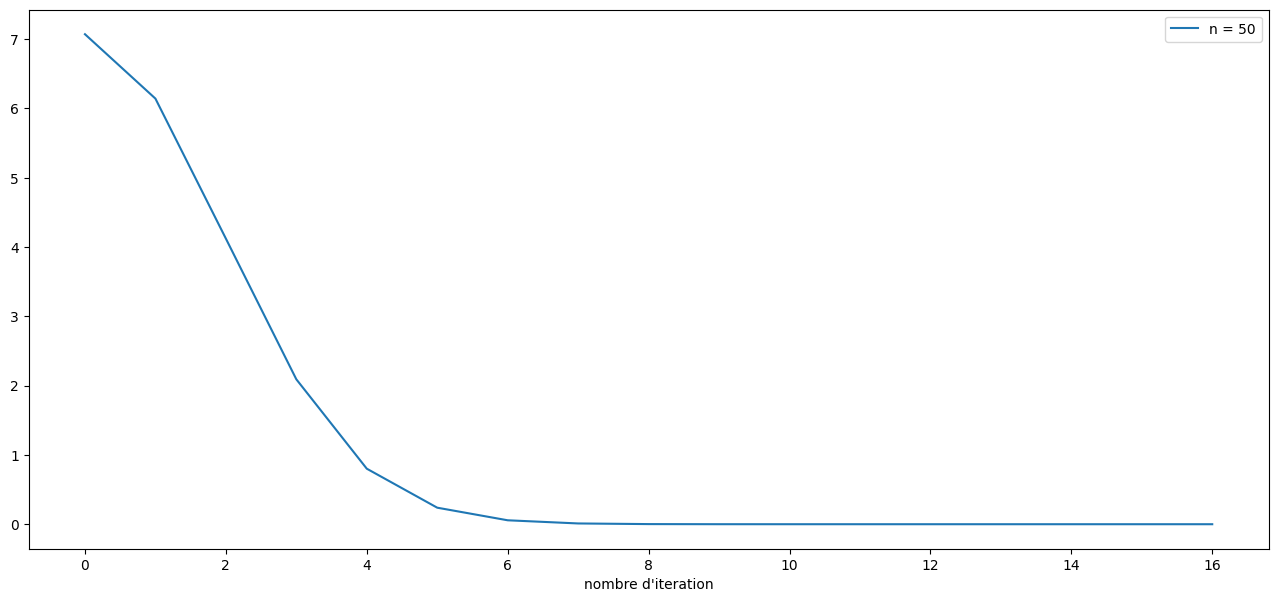

In [6]:
def my_gauss_seidel(A : np.ndarray, b: np.ndarray, x0: np.ndarray=None , epsilon=10e-12, max_iter=300):
    if x0 is not None:
        assert x0.shape == A.shape[0]
    else:
        x0 = np.ones((A.shape[0],))
    n = A.shape[0]
    M = np.fromfunction(lambda i, j: i >= j, (n,n), dtype=int)*1 * A
    N = M - A
    try:
        M_inv = np.diag(1/np.diag(M))
    except:
        M_inv = np.linalg.inv(M)
    
    J = M_inv@N
    B = M_inv@b
    x_old = x0.copy()
    x_history = [x_old]
    for k in range(max_iter):
        x_new = J@x_old + B
        x_history.append(x_new-x_old)
        if np.linalg.norm(x_new - x_old) < epsilon:
            break
        x_old = x_new.copy()
    errors = np.subtract(np.array(x_history) , x_new)
    errors = np.linalg.norm(x_history, axis=1)
    return x_new, errors


for n in range(len(H_matrix)):
    plt.figure(figsize=(16,7))
    A = H_matrix[n]
    b = np.ones(A.shape[0])
    x_star, errors = my_gauss_seidel(A, b)
    plt.plot(np.arange(errors.size), errors, label=f"n = {N[n]}")
    plt.xlabel("nombre d'iteration")
    plt.legend()

## Methode des matrices symetrique

In [7]:
def check_symmetric(a, tol=1e-8):
    return np.all(np.abs(a-a.T) < tol)

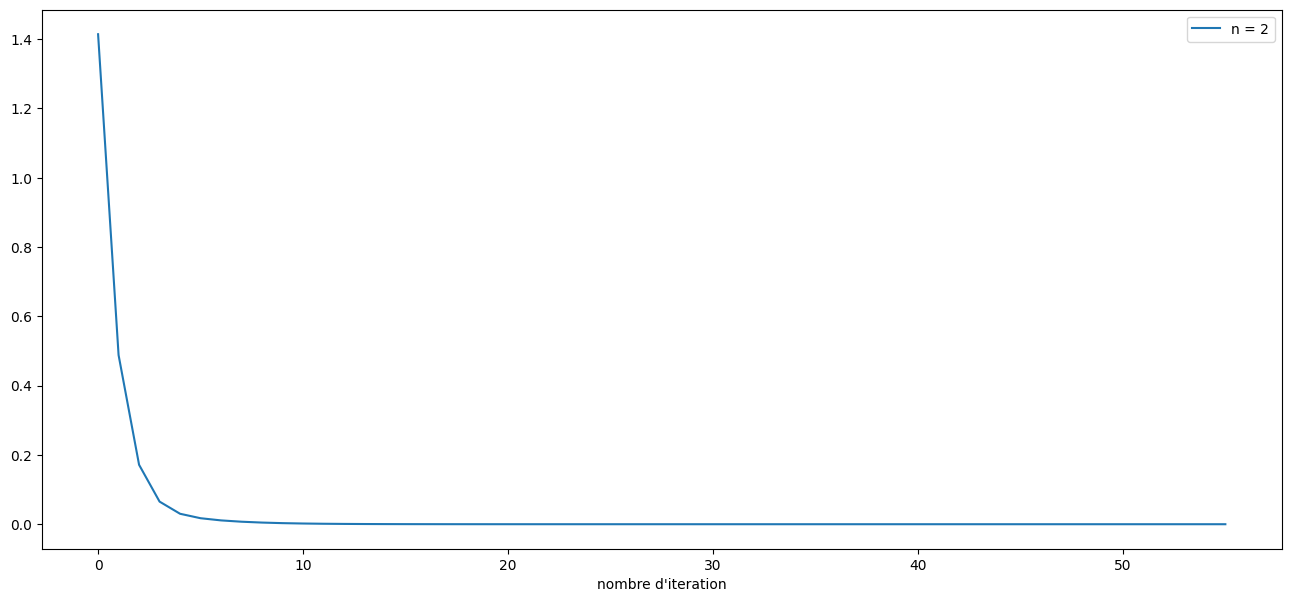

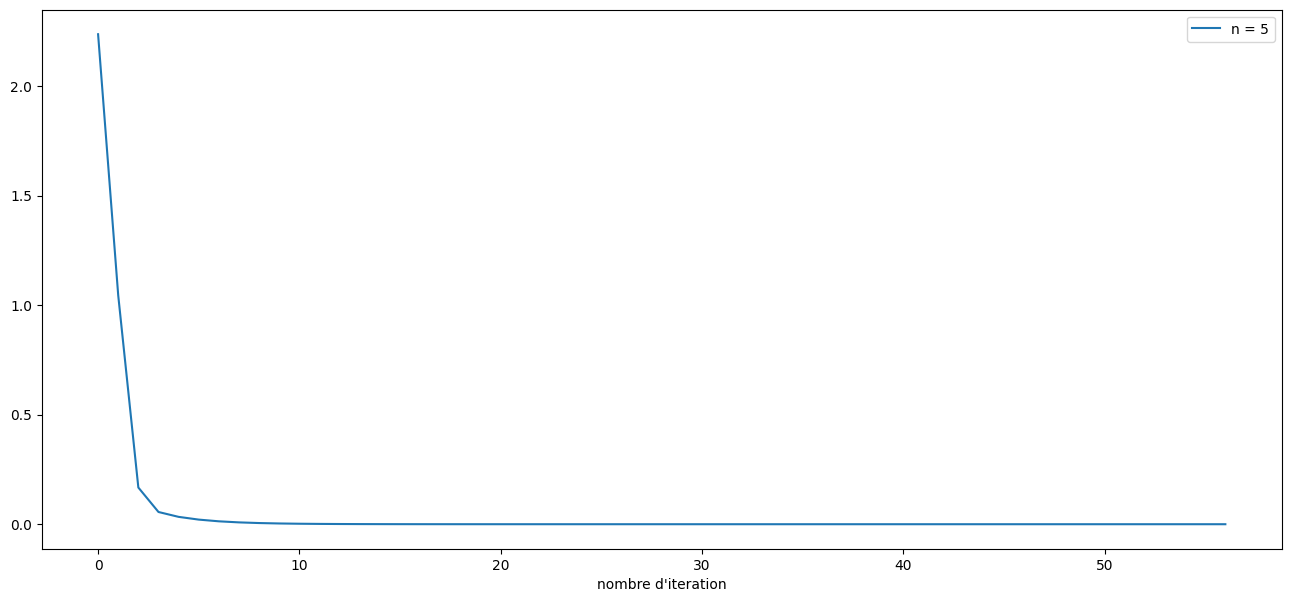

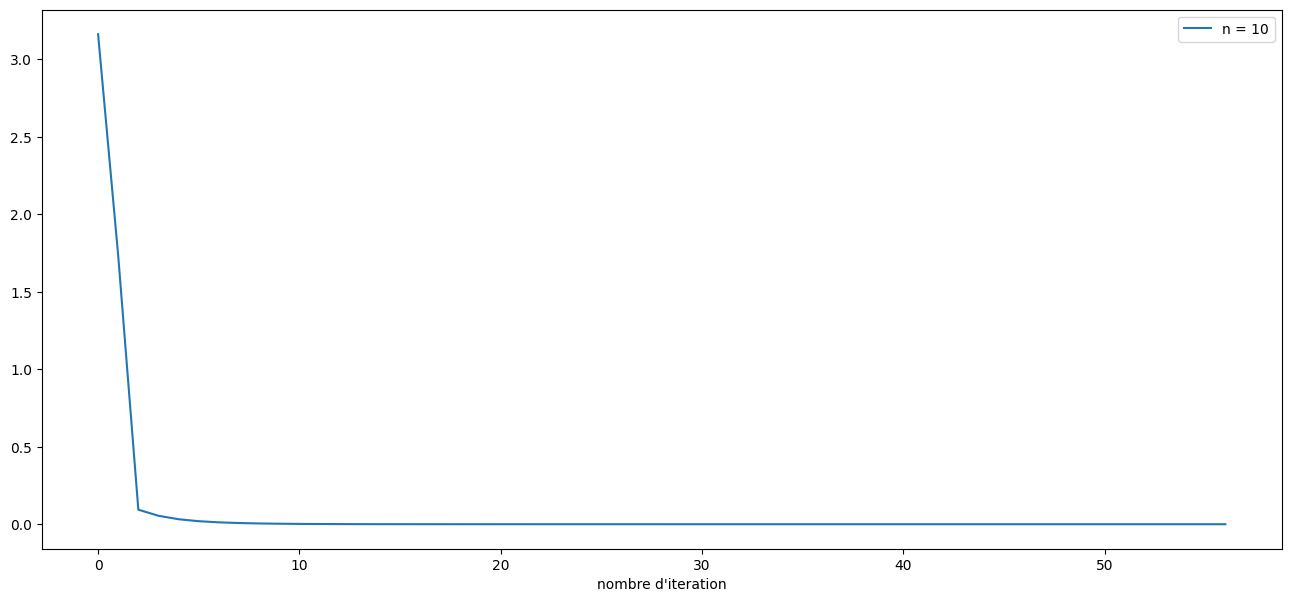

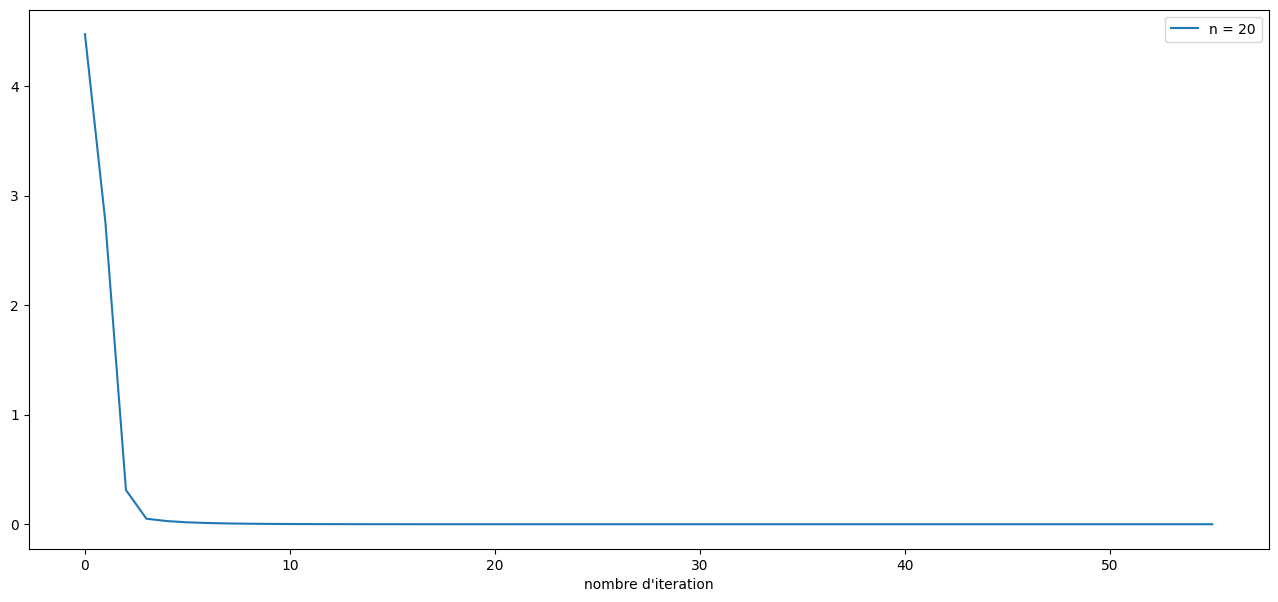

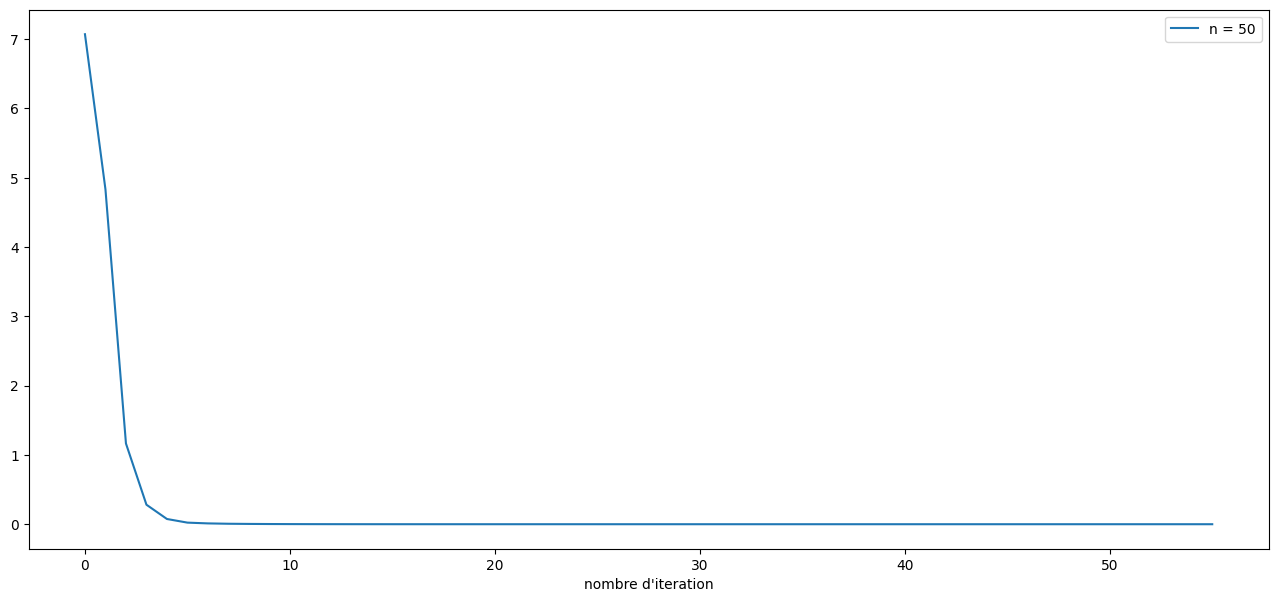

In [8]:
def symtric_matrix_decomposition(A : np.ndarray, b: np.ndarray, x0: np.ndarray=None , epsilon=10e-12, max_iter=300):
    if x0 is not None:
        assert x0.shape == A.shape[0]
    else:
        x0 = np.ones((A.shape[0],))
    assert check_symmetric(A)
    n = A.shape[0]
    M = 2 * np.diag(np.diag(A))
    N = M - A
    try:
        M_inv = np.diag(1/np.diag(M))
    except:
        M_inv = np.linalg.inv(M)
    
    J = M_inv@N
    B = M_inv@b
    x_old = x0.copy()
    x_history = [x_old]
    for k in range(max_iter):
        x_new = J@x_old + B
        x_history.append(x_new-x_old)
        if np.linalg.norm(x_new - x_old) < epsilon:
            break
        x_old = x_new.copy()
    errors = np.subtract(np.array(x_history) , x_new)
    errors = np.linalg.norm(x_history, axis=1)
    return x_new, errors



for n in range(len(H_matrix)):
    plt.figure(figsize=(16,7))
    A = H_matrix[n]
    b = np.ones(A.shape[0])
    x_star, errors = symtric_matrix_decomposition(A, b)
    plt.plot(np.arange(errors.size), errors, label=f"n = {N[n]}")
    plt.xlabel("nombre d'iteration")
    plt.legend()

# Normes matricielles

In [9]:
np.linalg.eigvals(H_matrix[0])

array([2.26759188, 1.06574145])

In [24]:


def norm_l1( A : np.ndarray):
    # vectorielle norm
    if len(A.shape) == 1:
        return np.abs(A).sum() 
    # matrix norm
    else:
        return np.max(np.abs(A).sum(axis=0))

def norm_l2(A : np.ndarray):
    # vectorielle norm
    if len(A.shape) == 1:
        return np.sqrt(A@A)
    # matrix norm
    else:
        return np.sqrt(np.linalg.eigvals(A@A.T).max())

def norm_inf(A : np.ndarray):
    # vectorielle norm
    if len(A.shape) == 1:
        return np.abs(A).max() 
    # matrix norm
    else:
        return np.max(np.abs(A).sum(axis=1))


In [20]:
a = np.random.randint(0, 9, (4))
a.T@a

53

## Jacobi

In [27]:
def check_inequality_jacobi(A : np.ndarray, b: np.ndarray, x0: np.ndarray=None , norm=norm_l1, epsilon=10e-12, max_iter=300):
    if x0 is not None:
        assert x0.shape == A.shape[0]
    else:
        x0 = np.ones((A.shape[0],))
    M = np.diag(np.diag(A))
    N = M - A
    try:
        M_inv = np.diag(1/np.diag(M))
    except:
        M_inv = np.linalg.inv(M)
    
    J = M_inv@N
    B = M_inv@b
    x_old = x0.copy()
    x_history = [x_old]
    for k in range(max_iter):
        x_new = J@x_old + B
        x_history.append(x_new)
        if np.linalg.norm(x_new - x_old) < epsilon:
            break
        x_old = x_new.copy()
    errors = np.subtract(np.array(x_history) , x_new)
    return np.all([ norm(errors[k]) <= norm(J)*norm(errors[k-1]) for k in range(1,len(errors))])
    



A = H_matrix[2]
b = np.ones(A.shape[0])

check_inequality_jacobi(A, b, norm=norm_l1), check_inequality_jacobi(A, b, norm=norm_inf)



(False, False)

## Gauss-seigel

In [31]:
def check_inequality_gauss(A : np.ndarray, b: np.ndarray, x0: np.ndarray=None , norm=norm_l1, epsilon=10e-12, max_iter=300):
    if x0 is not None:
        assert x0.shape == A.shape[0]
    else:
        x0 = np.ones((A.shape[0],))
    n = A.shape[0]
    M = np.fromfunction(lambda i, j: i >= j, (n,n), dtype=int)*1 * A
    N = M - A
    try: 
        M_inv = np.diag(1/np.diag(M))
    except:
        M_inv = np.linalg.inv(M)
    
    J = M_inv@N
    B = M_inv@b
    x_old = x0.copy()
    x_history = [x_old]
    for k in range(max_iter):
        x_new = J@x_old + B
        x_history.append(x_new)
        if np.linalg.norm(x_new - x_old) < epsilon:
            break
        x_old = x_new.copy()
    errors = np.subtract(np.array(x_history) , x_new)
    return np.all([ norm(errors[k]) <= norm(J)*norm(errors[k-1]) for k in range(1,len(errors))])



A = H_matrix[2]
b = np.ones(A.shape[0])

check_inequality_gauss(A, b, norm=norm_l1), check_inequality_gauss(A, b, norm=norm_l2), check_inequality_gauss(A, b, norm=norm_inf)



(True, True, True)

## Symetric matrix

In [32]:
def check_inequality_sym(A : np.ndarray, b: np.ndarray, x0: np.ndarray=None , norm=norm_l1, epsilon=10e-12, max_iter=300):
    if x0 is not None:
        assert x0.shape == A.shape[0]
    else:
        x0 = np.ones((A.shape[0],))
    assert check_symmetric(A)
    n = A.shape[0]
    M = 2 * np.diag(np.diag(A))
    N = M - A
    try: 
        M_inv = np.diag(1/np.diag(M))
    except:
        M_inv = np.linalg.inv(M)
    
    J = M_inv@N
    B = M_inv@b
    x_old = x0.copy()
    x_history = [x_old]
    for k in range(max_iter):
        x_new = J@x_old + B
        x_history.append(x_new)
        if np.linalg.norm(x_new - x_old) < epsilon:
            break
        x_old = x_new.copy()
    errors = np.subtract(np.array(x_history) , x_new)
    return np.all([ norm(errors[k]) <= norm(J)*norm(errors[k-1]) for k in range(1,len(errors))])



A = H_matrix[2]
b = np.ones(A.shape[0])

check_inequality_sym(A, b, norm=norm_l1), check_inequality_sym(A, b, norm=norm_l2), check_inequality_sym(A, b, norm=norm_inf)



(True, True, True)